In [1]:
!pip install vk

In [2]:
import vk 

In [3]:
token = ""  # Сервисный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=token)  # Авторизация
vk_api = vk.API(session)  # Авторизация

In [4]:
personal_token = ""  # Персональный ключ доступа, по завершении дз можно удалить для соблюдения конфиденциальности
session = vk.Session(access_token=personal_token)  # Авторизация
vk_personal_api = vk.API(session)  # Авторизация

In [5]:
import time

In [6]:
def get_members(groupid, fields=('sex', 'bdate', 'city', 'country', 'domain')):
    first = vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92)  # Первое выполнение метода
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 1000  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data = data + vk_api.groups.getMembers(group_id=groupid, fields=fields, v=5.92, offset=i*1000)["items"]
        time.sleep(0.5)
    return data

In [7]:
members = get_members("boscofreshfest")


In [8]:
len(members)

21242

In [9]:
def save_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учаcтника
            last_name = member["last_name"] # находим фамилию учаcтника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [10]:
filename = "boscofreshfestmembers.tsv"
save_members_to_file(filename, members)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pandas as pd

df = pd.read_csv("boscofreshfestmembers.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [13]:
df = df[df["name"] != "DELETED"]

In [14]:
df.head(100)

id       name    surname sex birth              city         country
0       34,    Tatyana  Plutalova   F     -  Saint Petersburg          Russia
1     1004,     Ksenia    Valdman   F     -  Saint Petersburg          Russia
2     1389,       Ivan  Bezborody   M  1986   Nizhny Novgorod          Russia
3     1418,  Stanislav     Medkov   M     -  Saint Petersburg          Russia
4     1479,  Anastasia   Abramova   F     -                 -          Russia
..      ...        ...        ...  ..   ...               ...             ...
97   49502,      Denis    Kolosov   M     -                 -  United Kingdom
98   49756,     Alexey    Grechin   M  1988  Saint Petersburg          Russia
99   51935,     Vitaly      Mirny   M  1987  Saint Petersburg          Russia
100  52121,     Alexey     Karpov   M  1988        Zelenograd          Russia
101  52847,  Alexander    Gudimov   M  1986             Trier         Germany

[100 rows x 7 columns]

In [17]:
city_count  = df['city'].value_counts()
city_count = city_count[:20]
print(city_count)

Moscow              7874
-                   5983
Saint Petersburg    1027
Yekaterinburg        142
Nizhny Novgorod      135
Kazan                123
Kyiv                  99
Voronezh              98
Rostov-on-Don         91
Krasnodar             87
Samara                84
Novosibirsk           72
Ufa                   72
Minsk                 70
Volgograd             65
Yaroslavl             60
Ryazan                57
Perm                  56
Chelyabinsk           55
Tula                  52
Name: city, dtype: int64
5983


In [18]:
zero_city = city_count[1]
res = len(members) - zero_city
print(res)
capitals = city_count[0] + city_count[2]
print(capitals)
others = res - capitals
print(others)

15259
8901
6358


In [246]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              27738
Москва              19934
Saint Petersburg     6474
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 562
Kazan                 554
Rostov-on-Don         506
Samara                498
Новосибирск           449
Минск                 449
Name: city, dtype: int64


-                   55876
Moscow              27738
Москва              19934
Saint Petersburg     6474
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 562
Kazan                 554
Rostov-on-Don         506
Samara                498
Новосибирск           449
Name: city, dtype: int64
55876


In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
import pandas as pd

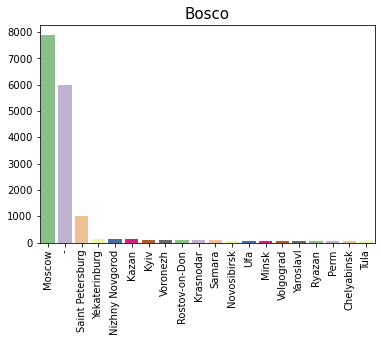

In [135]:
sns.barplot(city_count.index, city_count.values, palette='Accent') # рисуем график, выбираем цвет
plt.xticks(rotation=90) # разворачиваем подписи под городами на 90 градусов
plt.title('Bosco', fontsize=15)
plt.show() # показываем изображение

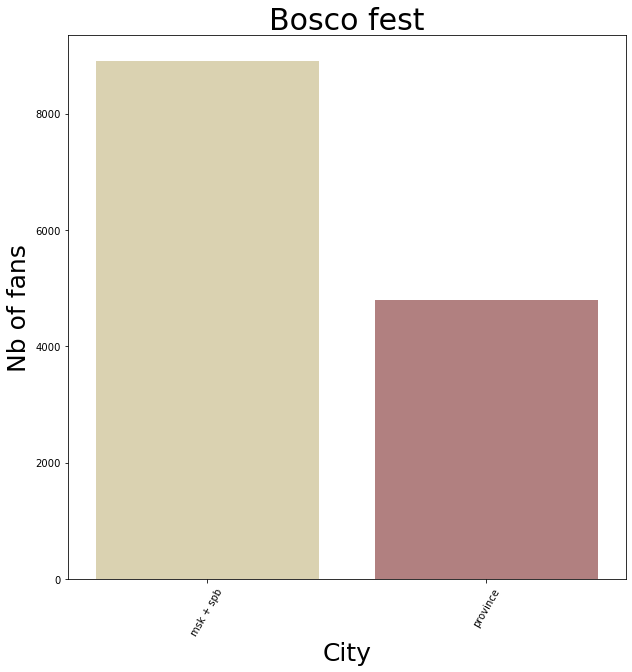

In [136]:
df.loc[(df['city'] == 'Moscow')] = "msk + spb"
df.loc[(df['city'] == 'Saint Petersburg')] = "msk + spb"
df.loc[(df['city'] != "msk + spb") & (df['city'] != "-")] = "province"


city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
plt.figure(figsize=(10,10)) #размер картинки
ax = sns.barplot(city_count.index,city_count.values, palette='pink_r') # рисуем график, выбираем цвет
plt.title('Bosco fest', fontsize=30)
plt.ylabel('Nb of fans', fontsize=25)
plt.xlabel('City', fontsize=25)
plt.xticks(rotation=60) # разворачиваем подписи под городами на 90 градусов
plt.show() # показываем изображение# your code here

In [209]:
with open("./Our_project-main/boscofreshfestmembers.tsv", 'r', encoding='utf-8') as f:
    members1 = f.read().split("\n")
    
with open("./Our_project-main/bolbfest_members", 'r', encoding='utf-8') as f:
    members2 = f.read().split("\n")
    
with open("./Our_project-main/picnicafishi.saved_members.tsv", 'r', encoding='utf-8') as f:
    members3 = f.read().split("\n")

with open("./Our_project-main/parklive_members (1).tsv", 'r', encoding='utf-8') as f:
    members4 = f.read().split("\n")

In [210]:
members3=set(members3)
members2=set(members2)
members1=set(members1)
members4=set(members4)

In [211]:
united_members = members1.union(members2).union(members3).union(members4)

In [232]:
with open ("united_members.tsv", "w",  encoding='utf-8') as f:
    for i in united_members:
        f.write(i + "\n")

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
import pandas as pd

df = pd.read_csv("united_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [235]:
df.head(11)

id         name      surname sex birth             city country
0   282019466,         Анна     Коничева   F     -        Хабаровск  Россия
1     9311605,        Elena    Baskakova   F     -           Moscow  Russia
2     1112219,        Tyoma      Gladkov   M  1986           Khimki  Russia
3   596612925,     Владимир     Рогожкин   M  1989           Москва  Россия
4   365536182,        Sofia  Skovorodina   F     -                -       -
5     1731505,     Антонина    Медведева   F     -  Санкт-Петербург  Россия
6    27738262,         Юлия        Мороз   F  1992            Курск  Россия
7   337193431,  Аполлинария      Балеева   F     -        Дзержинск  Россия
8     2493187,          Аня   Довольнова   F     -           Москва  Россия
9   328308709,        Ирина       Вербах   F     -                -       -
10  241336984,       Andrey  Viktorovich   M     -           Moscow  Russia

In [236]:
len(united_members)

163063

In [237]:
city_count  = df['city'].value_counts().drop('-') # считаем города и удаляем отсутствие города в табличке: "-"
city_count = city_count[:20] # первые 20 городов
print(city_count)

Moscow              27738
Москва              19934
Saint Petersburg     6474
Санкт-Петербург      6015
Нижний Новгород      1087
Nizhny Novgorod       856
Екатеринбург          759
Yekaterinburg         710
Воронеж               708
Самара                671
Краснодар             644
Казань                615
Voronezh              571
Ростов-на-Дону        568
Minsk                 562
Kazan                 554
Rostov-on-Don         506
Samara                498
Новосибирск           449
Минск                 449
Name: city, dtype: int64


In [212]:
intersected_members = members1.intersection(members2).intersection(members3).intersection(members4)

In [213]:
with open("intersection.tsv", "w", encoding="utf-8") as f:
    for i in intersected_members:
        print (i+"\n")



272457196,	DELETED		F	-	-	-

245228950,	Gleb	Kudryavtsev	M	-	-	-

2209816,	Anastasia	Filippova	F	-	-	-

140375325,	DELETED		M	-	-	-

354995045,	DELETED		M	-	-	-

450434415,	DELETED		M	-	-	-

10638063,	DELETED		M	-	-	-

390444756,	Roman	Aynutdinov	M	-	-	-

275745687,	Konchalovsky	Anastasia	F	-	-	-

398388997,	DELETED		M	-	-	-

54618600,	DELETED		M	-	-	-

246310088,	Helena	Bloomquist	F	-	-	-

559929829,	Ann	Nomad	F	2000	-	-

485390871,	DELETED		F	-	-	-

495923691,	Electrojam	Info	M	-	-	-

380354715,	All	Fest	M	1973	-	-

20197498,	Regina	George	F	-	-	-

8090090,	Mary	Stepanenko	F	-	-	-



In [224]:
len(intersected_members)

19

In [225]:
def save_intersected_members_to_file(filename, members):
    with open(filename, 'w', encoding='utf-8') as f:
        for member in members:
            _id = member["id"] # находим айди участника
            first_name = member["first_name"] # находим имя учаcтника
            last_name = member["last_name"] # находим фамилию учаcтника
            
            sex = member["sex"] # находим пол учатника (1 или 2)
            if int(sex) == 1:  # если пол это 1 
                sex = "F"  # обозначем женский пол как F
            elif int(sex) == 2:  # если пол это 2 
                sex = "M" # обозначем мужской пол как F
            else:  # если есть другой какой-то пол
                sex = "-"  # скорее всего нет, поэтому ставим прочерк
                
            bdate = member.get('bdate', "-")   # находим день рождения учатника
            if len(bdate.split(".")) == 3:  # нам нужен только год, если он есть
                bdate = bdate.split(".")[-1]  # то сохраняем год
            else:  # если год не указан, то возраст участника мы не узнаем
                bdate = "-"  # поэтому прочерк
                
            city = member.get('city', {}).get("title", "-")  # находим город участника
            country = member.get('country', {}).get("title", "-")  # находим страну участника
            f.write(f"{_id},\t{first_name}\t{last_name}\t{sex}\t{bdate}\t{city}\t{country}\n")  # сохраняем информацию в файл

In [226]:
filename = "intersected_members.tsv"
save_members_to_file(filename, members)

In [227]:
import pandas as pd

df = pd.read_csv("intersected_members.tsv", sep="\t", names=["id", "name", "surname", "sex", "birth", "city", "country"])

In [228]:
df = df[df["name"] != "DELETED"]

In [230]:
df.head(100)

id       name    surname sex birth              city         country
0       34,    Tatyana  Plutalova   F     -  Saint Petersburg          Russia
1     1004,     Ksenia    Valdman   F     -  Saint Petersburg          Russia
2     1389,       Ivan  Bezborody   M  1986   Nizhny Novgorod          Russia
3     1418,  Stanislav     Medkov   M     -  Saint Petersburg          Russia
4     1479,  Anastasia   Abramova   F     -                 -          Russia
..      ...        ...        ...  ..   ...               ...             ...
97   49502,      Denis    Kolosov   M     -                 -  United Kingdom
98   49756,     Alexey    Grechin   M  1988  Saint Petersburg          Russia
99   51935,     Vitaly      Mirny   M  1987  Saint Petersburg          Russia
100  52121,     Alexey     Karpov   M  1988        Zelenograd          Russia
101  52847,  Alexander    Gudimov   M  1986             Trier         Germany

[100 rows x 7 columns]

In [20]:
def get_posts(owner_id):
    first = vk_api.wall.get(domain=owner_id, count=100, filter="owner", v=5.124)
    data = first["items"]  # Присваиваем переменной первую тысячу id'шников
    count = first["count"] // 100  # Присваиваем переменной количество тысяч участников
    # С каждым проходом цикла смещение offset увеличивается на тысячу
    # и еще тысяча id'шников добавляется к нашему списку.
    for i in range(1, count+1):  
        data += vk_api.wall.get(domain=owner_id, v=5.124, filter="owner", count=100, offset=i*100)["items"]
    return [i['text'] for i in data]

In [21]:
posts = get_posts("boscofreshfest")

In [22]:
from datetime import datetime

In [24]:
posts[:10]

['Друзья, спасибо всем вам. Дожди не помешали мечте воплотиться, и на карту наших совместных впечатлений добавилось ещё одно место, ещё одно живое воспоминание. Мы обязательно вернёмся через год, и следующую игру начнём придумывать уже сейчас. Смена закрыта! До новой встречи.\n\n#bff19 #boscofreshfest',
 'Просто давайте еще раз вспомним, как нам было здорово вместе этим летом!\n\n#boscofreshfest2019 #bff19',
 'Вроде бы еще вчера мы соревновались и учились в шахматном кружке от [club163801495|CHESS & JAZZ] во Дворце пионеров. А уже с пятницы по субботу фестиваль шахмат и джаза принимает эстафету и выводит на сцену Сада Эрмитаж Грегори Портера, JMSN, Haelos и Tesla Boy (Jazz Special). \n\nPROMO CODE на все дни фестиваля: ANYTIMEJAZZ\n\n♞Билеты тут: https://vk.cc/9jIXiq\n\nДо встречи!',
 'Фотографии Димы Чунтула из лагеря BACARDI DANCEFLOOR&GLAMP. Танцует всё вокруг!\n\n#БАКАРДИ #БУДЬВДВИЖЕНИИ\n\nhttps://vk.com/album-51511917_263527109',
 'Из ареала обитания Range Rover Evoque и первого э

In [25]:
import re

In [26]:
pattern_link = re.compile(r"[A-z0-9]+[:/\.]+[A-z0-9]+[\./]+[A-z0-9]+[A-z0-9\./]+\b")

In [27]:
def replace_weblinks(posts):
    return re.sub(pattern_link, "WEBLINK", posts)
posts = [replace_weblinks(post) for post in posts] 

In [28]:
posts

['Друзья, спасибо всем вам. Дожди не помешали мечте воплотиться, и на карту наших совместных впечатлений добавилось ещё одно место, ещё одно живое воспоминание. Мы обязательно вернёмся через год, и следующую игру начнём придумывать уже сейчас. Смена закрыта! До новой встречи.\n\n#bff19 #boscofreshfest',
 'Просто давайте еще раз вспомним, как нам было здорово вместе этим летом!\n\n#boscofreshfest2019 #bff19',
 'Вроде бы еще вчера мы соревновались и учились в шахматном кружке от [club163801495|CHESS & JAZZ] во Дворце пионеров. А уже с пятницы по субботу фестиваль шахмат и джаза принимает эстафету и выводит на сцену Сада Эрмитаж Грегори Портера, JMSN, Haelos и Tesla Boy (Jazz Special). \n\nPROMO CODE на все дни фестиваля: ANYTIMEJAZZ\n\n♞Билеты тут: WEBLINK\n\nДо встречи!',
 'Фотографии Димы Чунтула из лагеря BACARDI DANCEFLOOR&GLAMP. Танцует всё вокруг!\n\n#БАКАРДИ #БУДЬВДВИЖЕНИИ\n\nWEBLINK-51511917_263527109',
 'Из ареала обитания Range Rover Evoque и первого электрического Jaguar I-Pac

In [29]:
pattern_mention = re.compile(r"[\(\[]+[a-z0-9]+\|[A-z0-9 А-я'\/\(\)\"]+[\]()]")

In [30]:
def replace_mentions(posts):
    return re.sub(pattern_mention, "MENTION", posts)

In [31]:
posts = [replace_mentions(post) for post in posts]
print(posts)

['Друзья, спасибо всем вам. Дожди не помешали мечте воплотиться, и на карту наших совместных впечатлений добавилось ещё одно место, ещё одно живое воспоминание. Мы обязательно вернёмся через год, и следующую игру начнём придумывать уже сейчас. Смена закрыта! До новой встречи.\n\n#bff19 #boscofreshfest', 'Просто давайте еще раз вспомним, как нам было здорово вместе этим летом!\n\n#boscofreshfest2019 #bff19', 'Вроде бы еще вчера мы соревновались и учились в шахматном кружке от [club163801495|CHESS & JAZZ] во Дворце пионеров. А уже с пятницы по субботу фестиваль шахмат и джаза принимает эстафету и выводит на сцену Сада Эрмитаж Грегори Портера, JMSN, Haelos и Tesla Boy (Jazz Special). \n\nPROMO CODE на все дни фестиваля: ANYTIMEJAZZ\n\n♞Билеты тут: WEBLINK\n\nДо встречи!', 'Фотографии Димы Чунтула из лагеря BACARDI DANCEFLOOR&GLAMP. Танцует всё вокруг!\n\n#БАКАРДИ #БУДЬВДВИЖЕНИИ\n\nWEBLINK-51511917_263527109', 'Из ареала обитания Range Rover Evoque и первого электрического Jaguar I-Pace!',

In [32]:
def clean_text(posts):
    posts = re.sub(pattern_link, "WEBLINK", posts)
    posts = re.sub(pattern_mention, "MENTION", posts)
    posts = posts.replace("\n", " ")
    return posts
with open('texts.txt', 'w', encoding="utf-8") as f:
    for post in posts:
        cleaned = clean_text(post)
        f.write(cleaned+"\n")

In [33]:
posts = "".join(posts)

In [34]:
posts

'Друзья, спасибо всем вам. Дожди не помешали мечте воплотиться, и на карту наших совместных впечатлений добавилось ещё одно место, ещё одно живое воспоминание. Мы обязательно вернёмся через год, и следующую игру начнём придумывать уже сейчас. Смена закрыта! До новой встречи.\n\n#bff19 #boscofreshfestПросто давайте еще раз вспомним, как нам было здорово вместе этим летом!\n\n#boscofreshfest2019 #bff19Вроде бы еще вчера мы соревновались и учились в шахматном кружке от [club163801495|CHESS & JAZZ] во Дворце пионеров. А уже с пятницы по субботу фестиваль шахмат и джаза принимает эстафету и выводит на сцену Сада Эрмитаж Грегори Портера, JMSN, Haelos и Tesla Boy (Jazz Special). \n\nPROMO CODE на все дни фестиваля: ANYTIMEJAZZ\n\n♞Билеты тут: WEBLINK\n\nДо встречи!Фотографии Димы Чунтула из лагеря BACARDI DANCEFLOOR&GLAMP. Танцует всё вокруг!\n\n#БАКАРДИ #БУДЬВДВИЖЕНИИ\n\nWEBLINK-51511917_263527109Из ареала обитания Range Rover Evoque и первого электрического Jaguar I-Pace!Финальная точка от 

In [35]:
words_re = [i.strip() for i in re.split(r"([ \.\?!,]{1,})", posts) if i.strip()] # и это повторяется от 1 до бесконечности раз
print(words_re)

['Друзья', ',', 'спасибо', 'всем', 'вам', '.', 'Дожди', 'не', 'помешали', 'мечте', 'воплотиться', ',', 'и', 'на', 'карту', 'наших', 'совместных', 'впечатлений', 'добавилось', 'ещё', 'одно', 'место', ',', 'ещё', 'одно', 'живое', 'воспоминание', '.', 'Мы', 'обязательно', 'вернёмся', 'через', 'год', ',', 'и', 'следующую', 'игру', 'начнём', 'придумывать', 'уже', 'сейчас', '.', 'Смена', 'закрыта', '!', 'До', 'новой', 'встречи', '.', '#bff19', '#boscofreshfestПросто', 'давайте', 'еще', 'раз', 'вспомним', ',', 'как', 'нам', 'было', 'здорово', 'вместе', 'этим', 'летом', '!', '#boscofreshfest2019', '#bff19Вроде', 'бы', 'еще', 'вчера', 'мы', 'соревновались', 'и', 'учились', 'в', 'шахматном', 'кружке', 'от', '[club163801495|CHESS', '&', 'JAZZ]', 'во', 'Дворце', 'пионеров', '.', 'А', 'уже', 'с', 'пятницы', 'по', 'субботу', 'фестиваль', 'шахмат', 'и', 'джаза', 'принимает', 'эстафету', 'и', 'выводит', 'на', 'сцену', 'Сада', 'Эрмитаж', 'Грегори', 'Портера', ',', 'JMSN', ',', 'Haelos', 'и', 'Tesla', '

In [ ]:
get 

In [39]:
!pip install pymystem3

In [68]:
from pymystem3 import Mystem

In [69]:
def lemmatize_text(posts):
    m = Mystem()
    lemmas = m.lemmatize(posts)
    lemmatized_text = ''.join(lemmas)
    return lemmatized_text

In [70]:
lemmatize_text(posts)

'друг, спасибо все вы. дождь не помешать мечта воплощаться, и на карта наш совместный впечатление добавляться еще один место, еще один живой воспоминание. мы обязательно вернуться через год, и следующий игра начинать придумывать уже сейчас. смена закрывать! до новый встреча.\n\n#bff19 #boscofreshfestПросто давать еще раз вспомнить, как мы быть здорово вместе этот лето!\n\n#boscofreshfest2019 #bff19Вроде бы еще вчера мы соревноваться и учиться в шахматный кружок от [club163801495|CHESS & JAZZ] во дворец пионер. а уже с пятница по суббота фестиваль шахматы и джаз принимать эстафета и выводить на сцена сад эрмитаж грегори портер, JMSN, Haelos и Tesla Boy (Jazz Special). \n\nPROMO CODE на весь день фестиваль: ANYTIMEJAZZ\n\n♞билет тут: WEBLINK\n\nдо встреча!фотография дима чунтул из лагерь BACARDI DANCEFLOOR&GLAMP. танцевать все вокруг!\n\n#бакарди #будьвдвижение\n\nWEBLINK-51511917_263527109Из ареал обитание Range Rover Evoque и первый электрический Jaguar I-Pace!финальный точка от егор м

In [71]:
!pip install emoji

In [90]:
import emoji
from collections import Counter

class Preprocessing:
    def __init__(self, text):
        self.text = text
    
    def get_sentences(self):
        return [i.strip() for i in self.text.replace("!", ".").replace("?", ".").replace("...", ".").replace(".\n", ". ").split(". ")]
    
    def get_words(self):
        return [i.strip(".,!?") for i in self.text.split()]
        
    def get_counted_words(self):
        words = {}
        for word in self.text.lower().split():
            if word in words:
                words[word] += 1
            else:
                words[word] = 1
        return words
    
    def get_emojis(self):
        return set([i for i in self.text if i in emoji.UNICODE_EMOJI])

In [89]:
preprocess = Preprocessing(posts)

In [81]:
s = preprocess.get_words()

In [82]:
s

['Друзья',
 'спасибо',
 'всем',
 'вам',
 'Дожди',
 'не',
 'помешали',
 'мечте',
 'воплотиться',
 'и',
 'на',
 'карту',
 'наших',
 'совместных',
 'впечатлений',
 'добавилось',
 'ещё',
 'одно',
 'место',
 'ещё',
 'одно',
 'живое',
 'воспоминание',
 'Мы',
 'обязательно',
 'вернёмся',
 'через',
 'год',
 'и',
 'следующую',
 'игру',
 'начнём',
 'придумывать',
 'уже',
 'сейчас',
 'Смена',
 'закрыта',
 'До',
 'новой',
 'встречи',
 '#bff19',
 '#boscofreshfestПросто',
 'давайте',
 'еще',
 'раз',
 'вспомним',
 'как',
 'нам',
 'было',
 'здорово',
 'вместе',
 'этим',
 'летом',
 '#boscofreshfest2019',
 '#bff19Вроде',
 'бы',
 'еще',
 'вчера',
 'мы',
 'соревновались',
 'и',
 'учились',
 'в',
 'шахматном',
 'кружке',
 'от',
 '[club163801495|CHESS',
 '&',
 'JAZZ]',
 'во',
 'Дворце',
 'пионеров',
 'А',
 'уже',
 'с',
 'пятницы',
 'по',
 'субботу',
 'фестиваль',
 'шахмат',
 'и',
 'джаза',
 'принимает',
 'эстафету',
 'и',
 'выводит',
 'на',
 'сцену',
 'Сада',
 'Эрмитаж',
 'Грегори',
 'Портера',
 'JMSN',
 'H

In [83]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [84]:
with open('stopwords_russian.txt', 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [93]:
clean_words = [word for word in posts if word not in stop_words]

In [94]:
words = word_tokenize(posts) #делит текст по пробелама
len(words)

58348

In [95]:
words[:10]

['Друзья',
 ',',
 'спасибо',
 'всем',
 'вам',
 '.',
 'Дожди',
 'не',
 'помешали',
 'мечте']

In [96]:
words = [i for i in words if i.isalnum()] #убираем !"" ())
len(words)

45867

In [97]:
len(Counter(words))

13133

In [113]:
def save_words_to_file(filename, members):
   save_words_to_file ("boscoposts.txt", words)

In [114]:
with open("stopwords_russian.txt", 'r', encoding="utf-8") as f:
    stop_words = f.read().lower().split("\n")
    stop_words = set(stop_words) # чтобы слова не повторялись, а в сете неп овтоярюстя слова плюс питон быстрее ищет в сетах, а не в списках

In [115]:
clean_words = [word for word in words if word not in stop_words]

In [116]:
Counter(clean_words).most_common(30)

[('MENTION', 416),
 ('Fresh', 377),
 ('WEBLINK', 374),
 ('Bosco', 365),
 ('Fest', 343),
 ('фестиваля', 180),
 ('билеты', 162),
 ('В', 152),
 ('фестиваль', 119),
 ('июня', 118),
 ('The', 113),
 ('А', 107),
 ('фестивале', 96),
 ('мая', 91),
 ('альбом', 90),
 ('группы', 84),
 ('группа', 84),
 ('сцене', 79),
 ('Билеты', 77),
 ('Мы', 75),
 ('Вы', 73),
 ('На', 69),
 ('Купить', 62),
 ('И', 61),
 ('FRESH', 57),
 ('альбома', 56),
 ('сайте', 56),
 ('BOSCO', 55),
 ('нашем', 55),
 ('выступление', 54)]

In [117]:
!pip install natasha

In [118]:
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, PER, NamesExtractor, Doc)

In [119]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [120]:
doc = Doc(posts)
doc.segment(segmenter)

In [121]:
[i.text for i in doc.sents]

['Друзья, спасибо всем вам.',
 'Дожди не помешали мечте воплотиться, и на карту наших совместных впечатлений добавилось ещё одно место, ещё одно живое воспоминание.',
 'Мы обязательно вернёмся через год, и следующую игру начнём придумывать уже сейчас.',
 'Смена закрыта!',
 'До новой встречи.',
 '#bff19 #boscofreshfestПросто давайте еще раз вспомним, как нам было здорово вместе этим летом!',
 '#boscofreshfest2019 #bff19Вроде бы еще вчера мы соревновались и учились в шахматном кружке от [club163801495|CHESS & JAZZ] во Дворце пионеров.',
 'А уже с пятницы по субботу фестиваль шахмат и джаза принимает эстафету и выводит на сцену Сада Эрмитаж Грегори Портера, JMSN, Haelos и Tesla Boy (Jazz Special).',
 'PROMO CODE на все дни фестиваля: ANYTIMEJAZZ\n\n♞Билеты тут: WEBLINK\n\nДо встречи!Фотографии Димы Чунтула из лагеря BACARDI DANCEFLOOR&GLAMP.',
 'Танцует всё вокруг!',
 '#БАКАРДИ #БУДЬВДВИЖЕНИИ\n\nWEBLINK-51511917_263527109Из ареала обитания Range Rover Evoque и первого электрического Jagua

In [122]:
print([i.text for i in doc.tokens])

['Друзья', ',', 'спасибо', 'всем', 'вам', '.', 'Дожди', 'не', 'помешали', 'мечте', 'воплотиться', ',', 'и', 'на', 'карту', 'наших', 'совместных', 'впечатлений', 'добавилось', 'ещё', 'одно', 'место', ',', 'ещё', 'одно', 'живое', 'воспоминание', '.', 'Мы', 'обязательно', 'вернёмся', 'через', 'год', ',', 'и', 'следующую', 'игру', 'начнём', 'придумывать', 'уже', 'сейчас', '.', 'Смена', 'закрыта', '!', 'До', 'новой', 'встречи', '.', '#', 'bff', '19', '#', 'boscofreshfest', 'Просто', 'давайте', 'еще', 'раз', 'вспомним', ',', 'как', 'нам', 'было', 'здорово', 'вместе', 'этим', 'летом', '!', '#', 'boscofreshfest', '2019', '#', 'bff', '19', 'Вроде', 'бы', 'еще', 'вчера', 'мы', 'соревновались', 'и', 'учились', 'в', 'шахматном', 'кружке', 'от', '[', 'club', '163801495', '|', 'CHESS', '&', 'JAZZ', ']', 'во', 'Дворце', 'пионеров', '.', 'А', 'уже', 'с', 'пятницы', 'по', 'субботу', 'фестиваль', 'шахмат', 'и', 'джаза', 'принимает', 'эстафету', 'и', 'выводит', 'на', 'сцену', 'Сада', 'Эрмитаж', 'Грегори'

In [123]:
doc.tag_morph(morph_tagger)
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [124]:
print([i.lemma for i in doc.tokens])

['друг', ',', 'спасибо', 'весь', 'вы', '.', 'дождь', 'не', 'помешать', 'мечта', 'воплотиться', ',', 'и', 'на', 'карта', 'наш', 'совместный', 'впечатление', 'добавиться', 'еще', 'один', 'место', ',', 'еще', 'один', 'живой', 'воспоминание', '.', 'мы', 'обязательно', 'вернуться', 'через', 'год', ',', 'и', 'следующий', 'игра', 'начать', 'придумывать', 'уже', 'сейчас', '.', 'смена', 'закрыть', '!', 'до', 'новый', 'встреча', '.', '#', 'bff', '19', '#', 'boscofreshfest', 'просто', 'давать', 'еще', 'раз', 'вспомнить', ',', 'как', 'мы', 'быть', 'здоровый', 'вместе', 'это', 'лето', '!', '#', 'boscofreshfest', '2019', '#', 'bff', '19', 'вроде', 'бы', 'еще', 'вчера', 'мы', 'соревноваться', 'и', 'учиться', 'в', 'шахматный', 'кружок', 'от', '[', 'club', '163801495', '|', 'chess', '&', 'jazz', ']', 'в', 'дворец', 'пионер', '.', 'а', 'уже', 'с', 'пятница', 'по', 'суббота', 'фестиваль', 'шахматы', 'и', 'джаз', 'принимать', 'эстафета', 'и', 'выводить', 'на', 'сцена', 'сад', 'эрмитаж', 'грегори', 'портер

In [125]:
doc.tag_ner(ner_tagger)

In [126]:
for span in doc.spans:
    print(posts[span.start:span.stop], span.type)

Дворце пионеров ORG
Сада Эрмитаж ORG
Грегори Портера PER
JMSN ORG
Haelos ORG
Tesla Boy ORG
Димы Чунтула PER
BACARDI DANCEFLOOR&GLAMP ORG
БАКАРДИ ORG
Егора Мелихова PER
Жора Сирота PER
Гоша Карцев PER
Bosco Fresh Fest ORG
Дима Шумов PER
Huawei ORG
Mastercard ORG
Bosco Fresh ORG
Дворца пионеров ORG
Токио LOC
CDDOMA ORG
Lapti ORG
Misha Geleyn ORG
Sputnik ORG
Никиты Горлова PER
Тимы Балдина PER
Насти Шуб PER
Павел PER
MARTINI ORG
Рошин PER
Мерфи PER
MARTINI ORG
Лилии Аиткуловой PER
Рошин Мерфи PER
VK ORG
Секция PER
Bosco Fresh Fest ORG
БУДЬВДВИЖЕНИИ ORG
СИБУР ORG
Палатке LOC
Bosco ORG
Яндекс.Афиша ORG
MARTINI ORG
BACARDI DANCEFLOOR&GLAMP ORG
BACARDI ORG
MARTINI ORG
Яндекс.Афиша ORG
Приятель PER
Moscow Film School ORG
IKRA ORG
Школа Дизайна ВШЭ ORG
EcoTechnologies ORG
Полезный Город LOC
BACARDI DANCEFLOOR&GLAMP ORG
BACARDI ORG
Martini ORG
Рошин Мёрфи PER
MARTINI ORG
Яндекс.Афиша ORG
Даблби PER
Gokos ORG
Megobari ORG
Mac & Cheese ORG
MeatUp ORG
Яндекс.Афиша ORG
Шепот PER
Токио LOC
Sputnik OR

In [128]:
with open("boscoposts.txt", 'w', encoding="utf-8") as w:
    for i in posts:
        w.write(i+"\n")

In [129]:
locations = set()
persons = set()
organizations = set()

with open("texts.txt", 'r', encoding="utf-8") as f:
    for line in f:
        posts = line.strip()
        
        doc = Doc(posts)
        doc.segment(segmenter)
        doc.tag_morph(morph_tagger)
        doc.tag_ner(ner_tagger)
        
        for span in doc.spans:
            span.normalize(morph_vocab)
        
            if span.type == 'LOC':
                locations.add(span.normal)
            
            elif span.type == 'PER':
                persons.add(span.normal)
            
            elif span.type == 'ORG':
                organizations.add(span.normal)

In [130]:
print(locations)

{'Норфолк', 'Европа', 'США', 'РЕСПУБЛИКИ', 'Германия', 'Швейцария', 'Австралия', 'Тольятти', 'Оранжерейный мост', 'Краснодар', 'Царицын', 'Огонь', 'Алма-Ата', 'Нант', 'Лету', 'Техас', 'Орехово', 'Горький', 'Замоскворецкая', 'Казахстан', 'Лондон', 'Музеон', 'Царицыно', 'Вист', 'Парк', 'Дания', 'Свалка', 'Канада', 'Китай', 'Норвегия', 'Нью-Йорк', 'Самарой', 'Евровидении', 'Белоруссия', 'Гарлем', 'Лужники', 'Франция', 'Колос', 'Кофемания', 'Голландия', 'Венгрия', 'Лос-Анджелес', 'Беларусь', 'Хабаровск', 'Хельсинки', 'Метафест', 'Керчь', 'Вильнюс', 'Таганрог', 'Урал', 'Восточный Лондон', 'Вена', 'Ставрополь', 'Казантип', 'Токио', 'Тайга', 'Архангельском', 'Петербург', 'Британские острова', 'Владивосток', 'Земля', 'Окуджав', 'Солянка', 'Австрия', 'Палатка', 'Эрмитаж', 'Рейкьявик', 'Япония', 'Париж', 'Англия', 'Италия', 'Вирджиния', 'Бирмингем', 'Киото', 'Сиэтл', 'Парк Царицыно', 'Дорнобанде', 'Шаляпин', 'Варшава', 'Ботанический сад', 'Британия', 'Нижний Новгород', 'Баженовский зал', 'Азия',

In [131]:
print(persons)

{'Терренс Тоорнтон', 'Антон Малинена', 'Антон Андреев', 'Хармс', 'Андрей Джиджиковы', 'Леша', 'Антон Кузнецов', 'Ассаи', 'Наадя', 'Sarah Sitkin', 'Олоф Дрейер', 'David August', 'Lil Wayne', 'Йоши Ямамото', 'Игорь Андреева', 'Джордон Александер', 'Ричи Хэвенс', 'Царицыно', 'Алекс Тернер', 'Ле Пикник', 'Дмитрий Шуров', 'Михаил фон Галля', 'Алена Ахмадуллина', 'Ли Кертис (Lee Curtiss)', 'Lee', 'Петр Иванов', 'Оксана Мороз', 'Друг', 'Ив Сен Лоран', 'Максим', 'Ворошнин', 'Александр Мельник', 'Алекс Клэр', 'Земфира', 'Пол', 'Лоуренс Даймонд', 'Дэвид Аджайе', 'Стас Расторгуев', 'Екатерина Нитченко', 'Юрий Квятковский', 'Вадим Королев', 'Миша Мищенко', 'Блейка', 'Поприветствуем Johnnie Fizz', 'Rick Ross & Kanye West)', 'Gene', 'Ивар Максутов', 'Макс Хаген', 'Мерфь', 'Шерлок Холмс', 'Окуджав', 'Тим Аминов', 'Лагутенко', 'Скай Эдвардс', 'Макарычевыми', 'Роберт Ленц', 'Мерфи', 'Мак', 'Электротеатром Станиславский', 'Любовь Кузьмина', 'Оу', 'Спиритический', 'Лилия', 'Есенин', 'Музыка-музыкой', 'Бо

In [132]:
print(organizations)

{'Cassius', 'Feedelity', 'Radio Silence', 'Miusha', 'IDM', 'Ассаи', 'Наадя', 'The Village', 'Kilim', 'GOOD Music', 'Comedy Club', 'MARTINI', 'Tele', 'Bon Iver', 'Soulwax', 'The Correspondents\ufeff', 'Seth & Riley’s Garage', 'Apple', 'Проспект мир', 'Lil Wayne', 'Планета', 'Armani', 'HONNE', 'Odd Future', 'Top', 'Кетам records', 'Tele2', 'Faux Pas Tattoo', 'Ajika', 'Arctic Monkeys', 'Медуза', 'Cruel Tie', 'Мегаполис FM', 'Akimov', 'Columbia Records', 'Nikola Melnikov', 'Музеон', 'Urban Decay', 'BACARDI', 'Banks', 'Ле Пикник', 'The Ting Tings', 'Beach PARTY', 'SOHN', 'Florence & The Machine', 'Poco Cox', 'Московский Дворец пионеры', 'Holymollyyyy', 'ФРУКТЫ', 'МХАТ', 'Clipse', 'Real Good Hands', 'IG', 'Telegram', 'Synergy Orchecstra', 'Vladimir Cauchemar', 'Esquire', 'Парк Горький MENTION', 'Сноб', 'КОНТАКТЫ', 'Chernika Swim', 'Esthetix', 'Beyonce', 'Во Дворец пионеры', 'Anatoli Ice', 'YSL', 'АССАИ', 'Underworld', 'UIQ', 'Fancy State', 'Funk Family Flava', 'The XX', 'Thunderlab Podcast',